## Conjugate Prior and Metropolis-Hastings
##### Author: Rajkumar Conjeevaram Mohan (rajkumarcm@yahoo.com)

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import norm
from functools import reduce
from ipywidgets import interact, IntSlider
np.random.seed(123)

In [2]:
mu_x = 100
var_x = 100

In [3]:
@interact(mu_w=IntSlider(min=20, max=300, continuous_update=False), 
          N=IntSlider(min=10, max=500, continuous_update=False))
def plot_posterior(mu_w, N):
    #N = 10
    x = np.random.normal(loc=mu_x, scale=np.sqrt(var_x), size=N)
    x = np.sort(x)

    # mu_w = 120
    var_w = 100
    w = np.random.normal(loc=mu_w, scale=np.sqrt(var_w), size=1000)
    w = np.sort(w)
    
    # Posterior parameters estimated by completing the squares
    var_p = (var_x * var_w)/(N * var_w + var_x)
    mu_p = (var_w * np.sum(x) + var_x * mu_w)/(N * var_w + var_x)
    
    ran_samples = np.random.normal(loc=mu_x, scale=np.sqrt(var_x), size=1000)
    ran_samples = np.sort(ran_samples)
    ran_samples2 = np.random.normal(loc=mu_p, scale=np.sqrt(var_x), size=1000)
    ran_samples2 = np.sort(ran_samples2)
    x_pdf = norm.pdf(ran_samples, loc=mu_x, scale=np.sqrt(var_x))
    w_pdf = norm.pdf(w, loc=mu_w, scale=np.sqrt(var_w))
    p_pdf = norm.pdf(ran_samples2, loc=mu_p, scale=np.sqrt(var_x))

    plt.figure()
    plt.plot(ran_samples, x_pdf, '-b', linewidth=0.8, label='Likelihood')
    plt.plot(w, w_pdf, '-r', linewidth=0.8, label='Prior')
    plt.plot(ran_samples2, p_pdf, '-g', linewidth=0.8, label='Posterior')
    plt.legend()
    plt.title('Influence of prior on posterior when N is low')
    plt.show()
    print(mu_p, var_p)

interactive(children=(IntSlider(value=20, continuous_update=False, description='mu_w', max=300, min=20), IntSl…

<h4>When the data size is inadequate, the prior (belief) does influence the posterior distribution.</h4>

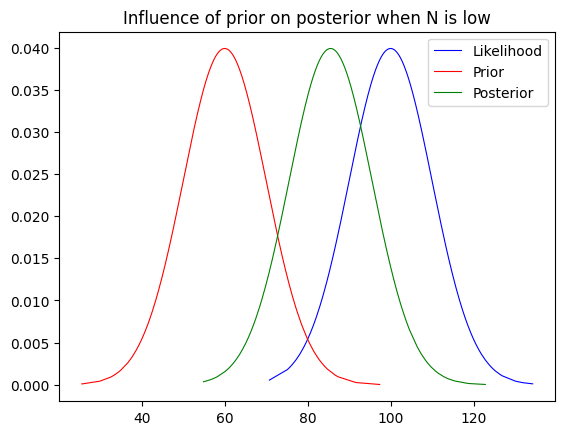

85.52563874190682 33.333333333333336


In [12]:
plot_posterior(mu_w=60, N=2)

<h4>As the data size increases, the prior gets washed away. This makes the posterior distribution align with the likelihood.</h4>

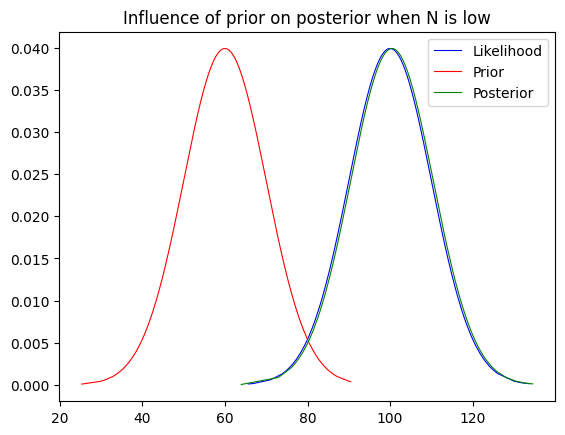

100.44975973504265 0.24937655860349128


In [13]:
plot_posterior(mu_w=60, N=400)

In [4]:
mu_x, var_x

(100, 100)

In [5]:
var_w = 100

@interact(N=IntSlider(min=10, max=100, continuous_update=False), 
          mu_w=IntSlider(min=10, max=300, continuous_update=False))
def metropolis(N, mu_w):
    tmp_x = np.random.normal(loc=mu_x, scale=np.sqrt(var_x), size=N)
    fn = lambda mu: np.random.normal(loc=mu, scale=np.sqrt(var_w))
    pdf_x = lambda x, mu: norm.pdf(x, loc=mu, scale=np.sqrt(var_x))
    pdf_w = lambda w, mu: norm.pdf(w, loc=mu, scale=np.sqrt(var_w))
    mu = [fn(mu_w)]
    n_samples = 30000
    offset = 100
    for i in range(n_samples-1):
        tmp_mu = fn(mu[-1])
        r = np.sum(np.log(pdf_x(tmp_x, tmp_mu))) + np.log(pdf_w(tmp_mu, var_w))
        r -= np.sum(np.log(pdf_x(tmp_x, mu[-1]))) + np.log(pdf_w(mu[-1], var_w))
        if np.log(np.random.uniform(0, 1)) <= r:
            # accept the sample
            mu.append(tmp_mu)
        else:
            mu.append(mu[-1])
    plt.figure(figsize=(11, 5))
    plt.plot(range(n_samples-offset), mu[offset:], '.g', linewidth=1.5, label='sampled $\mu$')
    plt.axhline(np.mean(mu), xmin=0, xmax=len(mu)-offset, color='red', label='average $\mu$')
    plt.legend()
    plt.grid()
    plt.title('Metropolis Hastings %.2f' % np.mean(mu))
    plt.show()

interactive(children=(IntSlider(value=10, continuous_update=False, description='N', min=10), IntSlider(value=1…